In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('NetflixOriginals.csv')

In [4]:
df.head(20)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [6]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [7]:
df.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [8]:
df.Genre.nunique()

115

In [11]:
df.Language.nunique()

38

In [12]:
df=df.astype({'Genre':'category','Language':'category'})

In [13]:
df['Premiere']=pd.DatetimeIndex(df['Premiere'])

In [14]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [15]:
df.dtypes

Title                 object
Genre               category
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language            category
dtype: object

In [16]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


<AxesSubplot:>

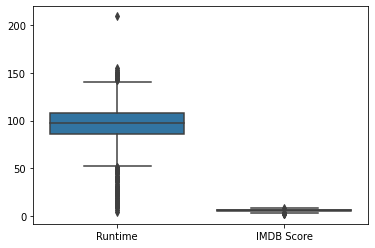

In [18]:
import seaborn as sns
sns.boxplot(data=df)

<AxesSubplot:>

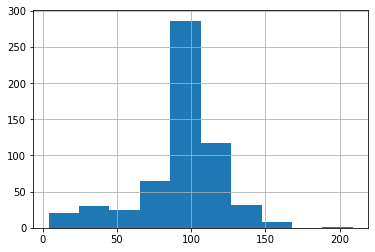

In [19]:
df['Runtime'].hist()

<AxesSubplot:>

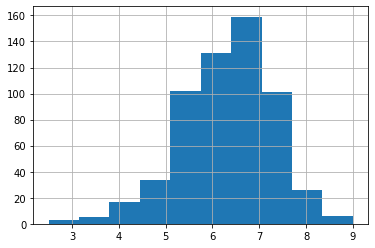

In [20]:
df['IMDB Score'].hist()

In [21]:
df_numeric=df[['Runtime','IMDB Score']]

In [22]:
df_numeric.head()

,Runtime,IMDB Score
0,58,2.5
1,81,2.6
2,79,2.6
3,94,3.2
4,90,3.4


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_numeric=pd.DataFrame(scaler.fit_transform(df_numeric), columns=['Runtime','IMDB Score'])

array([[<AxesSubplot:title={'center':'Runtime'}>,
        <AxesSubplot:title={'center':'IMDB Score'}>]], dtype=object)

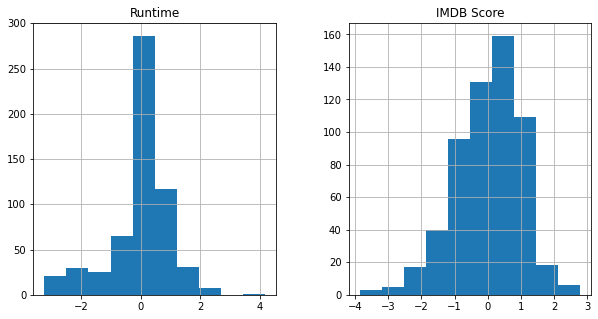

In [24]:
df_numeric.hist(figsize=(10,5))

In [25]:
round(df_numeric.mean())

Runtime       0.0
IMDB Score    0.0
dtype: float64

In [26]:
round(df_numeric.std())

Runtime       1.0
IMDB Score    1.0
dtype: float64

In [27]:
df[['Runtime','IMDBScore']]=df_numeric

In [28]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,IMDBScore
0,Enter the Anime,Documentary,2019-08-05,-1.282615,2.5,English/Japanese,-3.854945
1,Dark Forces,Thriller,2020-08-21,-0.453425,2.6,Spanish,-3.752740
2,The App,Science fiction/Drama,2019-12-26,-0.525528,2.6,Italian,-3.752740
3,The Open House,Horror thriller,2018-01-19,0.015248,3.2,English,-3.139505
4,Kaali Khuhi,Mystery,2020-10-30,-0.128959,3.4,Hindi,-2.935093
